# MATH2319_Machine Learning_Phase 1

##### Sudeshna Nayek
##### S3821041 - Group 7

-------------------------------------------------------------------------------------------------------------------

## Introduction:

### Dataset Source:

In this assignment we are going to analyse and build a model which best suits to predict potential customers who might withdraw their accounts from the bank. The bank data is named as 'Churn Modelling.csv' and is taken from an open source : "https://www.kaggle.com/santoshd3/bank-customers" 

### Dataset Details: 

The dataset comprises of details of bank customer who were and are associated with them.
It contains information of their bank id, Surname, Credit score, location, Gender, Age, Tenure, Account Balance, Number of products they own, whether they possess credit card, are they an active member, estimated salary and whether they still holds account in the bank or have churned. 
There are 14 columns and 10000 observations.

### Dataset features

Below table shows the details of the features that are used from Churn Modelling.csv file:


| Feature_name | Data_Type | Units | Description |
| :- | :- | :- | :- |
| CreditScore | Integer | N/A | Customer's bank credit score based on transactional details; Continuous.
| Geography | String | N/A | Country or region the customer belongs from: France, Germany and Spain; Categorical.
| Gender | String | N/A | Male or Female; Categorical.
| Age | Integer | Years | CUstomer's age; Continuous.
| Tenure | Integer | Years | Duration of the customer holding account in the bank (1 to 10); Categorical.
| Balance | Float | Euro | Amount in account; Continuous.
| NumOfProducts | Integer | N/A | Number of services the customer is engaged with (1 to 4); Categorical
| HasCrCard | Integer | N/A | Whether customer holds credit card or not (0- No, 1- Yes); Categorical
| IsActiveMember | Integer | N/A | Active with different functionalities with bank like programs, bonds, insurance etc. (0- No, 1- Yes); Categorical.
| EstimatedSalary | Float | Euro | Salary estimated by bank; Continuous.


### Target Feature:

As we are going to perform a churn prediction therefore the target variable here is Exited. 1 if the customer has left and 0 if they still hold an account in the bank.

## Goals and Objective:

Banks are all about customers and their satisfaction. No banks can run without customers hence, losing customers without any knowledge of the main reasons can cause a bank to even shut down completely. A customer can withdraw their account from the bank for multiple reasons such as not getting the expected service/ benefits, products offered did not suit their requirements, found better offers in a competitive bank, etc. Therefore, in order to retain customers, the bank needs to analyze the reason behind customer attrition and work/ rectify those areas in order to grow. Analysis of churn should be done frequently as it can lead to higher customer acquisition cost (CAC) and reduced revenue. No banks want that as acquiring new customers costs higher than maintaining the existing ones.

The objective for choosing this dataset is mainly the data as it contains features that most banks would provide in order to perform real time churn analysis. A thorough analysis of this data will broaden my understanding of how banks can benefit if the identification of churn customers are done on time. Having worked as an analyst in banking domains earlier motivated me to choose this industry to explore further. 

## Data cleaning and Preprocessing:

### Importing required libraries: 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Reading the dataset for analysis and displaying top 10 observations.

In [2]:
pd.set_option('display.max_columns', None)
churn_ds = pd.read_csv('/Users/sudeshna/Documents/Machine Learning/Phase 1/Data_Group7.csv')
churn_ds.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


As RowNumber and CustomerID contains 10000 unique values and Surname does not have any statistical predictive power, we will drop them at the very beginning in order to save processing time.

In [3]:
churn_ds.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace = True)

In [4]:
churn_ds.sample(10, random_state=123)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2656,779,Spain,Female,34,5,0.00,2,0,1,111676.63,0
445,748,France,Female,26,1,77780.29,1,0,1,183049.41,0
9505,651,France,Male,28,10,79562.98,1,1,1,74687.37,0
332,663,Germany,Male,44,2,117028.60,2,0,1,144680.18,0
4168,516,France,Male,37,8,0.00,1,1,0,101834.58,0
2364,707,France,Female,31,2,82787.93,2,0,0,91423.69,0
6097,575,Germany,Male,47,9,107915.94,2,1,1,63452.18,1
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
7752,490,Spain,Female,38,3,97266.10,1,1,1,92797.23,0
4453,809,Germany,Male,33,8,148055.74,1,0,0,199203.21,0


### Finding missing values in the dataset.

In [5]:
churn_ds.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

We can see that there is no missing values therefore, we can proceed further with the analysis.

### Checking data types of the variables.

In [6]:
churn_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


We can see that Geography and Gender are "Object" type. We will convert them later into numerical data type in order to make it suitable for analysis.


### Data Statistics Summary 

Displays the statistics of the numerical (int64) features. 

In [7]:
churn_ds.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Checking for Outliers 

We will plot a Boxplot to detect outliers in CreditScore variable.

Text(0.5, 1.0, 'Fig 1: Boxplot for Credit Score')

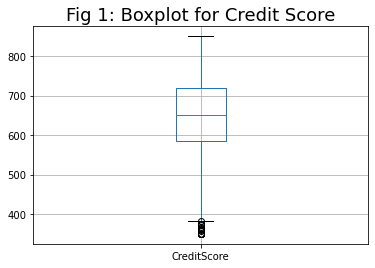

In [8]:
churn_ds.boxplot(column=['CreditScore'])
plt.title("Fig 1: Boxplot for Credit Score", size= 18)

As we can see there are few outliers in the data, we are going to find how many records are less than 380 (approximated from the boxplot).

In [9]:
churn_ds.loc[(churn_ds['CreditScore'] < 380)]


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
942,376,France,Female,46,6,0.00,1,1,0,157333.69,1
1193,363,Spain,Female,28,6,146098.43,3,1,0,100615.14,1
1405,359,France,Female,44,6,128747.69,1,1,0,146955.71,1
1631,350,Spain,Male,54,1,152677.48,1,1,1,191973.49,1
1838,350,Germany,Male,39,0,109733.20,2,0,0,123602.11,1
1962,358,Spain,Female,52,8,143542.36,3,1,0,141959.11,1
2473,351,Germany,Female,57,4,163146.46,1,1,0,169621.69,1
2579,365,Germany,Male,30,0,127760.07,1,1,0,81537.85,1
8154,367,Spain,Male,42,6,93608.28,1,1,0,168816.73,1


There are 14 records having Credit Score less than 380 therefore, removing the records as deleting 14 records from 1000 won't affect our analysis in turn, it will help the data get normalized.

In [10]:
churn_ds= churn_ds.loc[(churn_ds['CreditScore'] > 380)]

churn_ds.count()

CreditScore        9986
Geography          9986
Gender             9986
Age                9986
Tenure             9986
Balance            9986
NumOfProducts      9986
HasCrCard          9986
IsActiveMember     9986
EstimatedSalary    9986
Exited             9986
dtype: int64

In [11]:
churn_ds['Age'].describe()

count    9986.000000
mean       38.914881
std        10.486998
min        18.000000
25%        32.000000
50%        37.000000
75%        44.000000
max        92.000000
Name: Age, dtype: float64

We can see that Age ranges from 18 to 92 which is normal. We are still going to plot a histogram to see the distribution and get the skewness to check if there are any major signs of right/left skewness.

Skewness of variable Age is :
1.0131932009391316


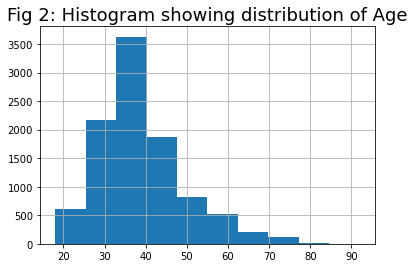

In [12]:
churn_ds.Age.hist()
plt.title("Fig 2: Histogram showing distribution of Age", size= 18)


print('Skewness of variable Age is :')
print(churn_ds['Age'].skew())


We can see that Age is slightly right skewed, however, there are no extreme outliers present. Infact, the values are quiet natural, so we are not going to remove any records.
Apart from CreditScore and Age there are no variables with major outlier values.

The data is now clean and we can proceed with the exploration.

## Data Exploration and Visualisation

Next, we are going to analyse the details of the churned customers. Firstly, we will see the percentage of the customers who have left. (Exited- 1, Not Exited- 0)

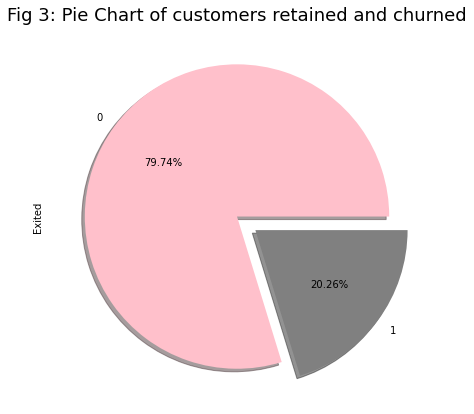

Total number of customers who have NOT Exited: 0 and Exited: 1


0    7963
1    2023
Name: Exited, dtype: int64

In [13]:
value_counts = pd.value_counts(churn_ds['Exited'])
plt.figure(figsize = (8,7))
myexplode = [0,0.15]
value_counts.plot.pie( explode = myexplode ,autopct='%2.2f%%', shadow=True, colors = ['pink', 'gray'])
plt.title('Fig 3: Pie Chart of customers retained and churned', size= 18)
plt.show()
print('Total number of customers who have NOT Exited: ''0'' and Exited: ''1')
value_counts

Fig.3 shows that almost 80% customers are still associated with the bank. Let's analyse the main features responsible for the customer to leave.
 
Next we will plot Exited against all the categorical values to see any noticeable relations:

Fig. 4: Countplots of Gender, Geography, IsActiveMember and HasCrCard 


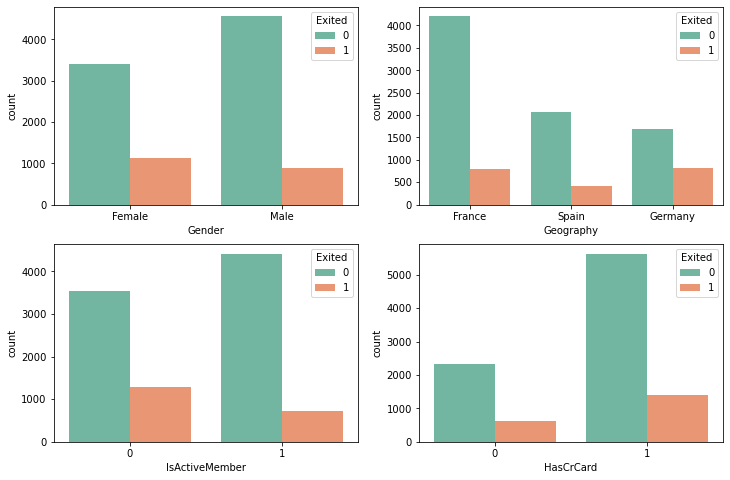

In [14]:
fig, arr = plt.subplots(2, 2, figsize=(12, 8))
sns.countplot(x='Gender', data = churn_ds, hue = 'Exited', ax=arr[0][0], palette = "Set2")
sns.countplot(x='Geography',data = churn_ds, hue = 'Exited', ax=arr[0][1], palette = "Set2")
sns.countplot(x='IsActiveMember', data = churn_ds, hue = 'Exited', ax=arr[1][0], palette = "Set2")
sns.countplot(x='HasCrCard', data = churn_ds, hue = 'Exited', ax=arr[1][1], palette = "Set2")
print("Fig. 4: Countplots of Gender, Geography, IsActiveMember and HasCrCard ")

##### Observations from the above plots:

>Plot 1: Gender: We can see the churn rate of Female customers is higher than Male customers (Exited=1).

>PLot 2: Geography: Customers from France are in majority when comes to association with the bank. However, the churn numbers of France and Germany almost stands equal.

>Plot 3: IsActiveMember: Active customers of bank (IsActiveMember=1) has a lower churn rate than inactive members. The proportion of exited to retained customers in case of inactive members is greater than that of active members.

>Plot 4: HasCrCard: On the contrary to what we could have expected, customers with credit cards have higher churn numbers.



Next, we will plot distribution of Gender among the bank customers.

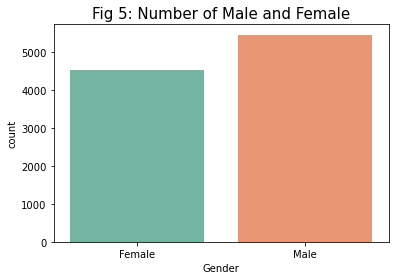

In [15]:
sns.countplot(x="Gender", data=churn_ds, palette="Set2")
plt.title('Fig 5: Number of Male and Female', size= 15)
plt.show()

The count plot shows the distribution of gender in the data. We can see that Male are higher in number than female. 
 
#### Label Encoding 

Label encoding Gender column in order to get rid of categorical values, storing it in Gender_cat and dropping Gender column with the categorical values. (0 will be assigned to Female and 1 to Male)

In [16]:
from sklearn.preprocessing import LabelEncoder
label= LabelEncoder()
churn_ds["Gender_cat"]= label.fit_transform(churn_ds["Gender"])

churn_ds.drop(columns=['Gender'], inplace=True)

In [17]:
churn_ds.head(10)

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_cat
0,619,France,42,2,0.00,1,1,1,101348.88,1,0
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0,0
2,502,France,42,8,159660.80,3,1,0,113931.57,1,0
3,699,France,39,1,0.00,2,0,0,93826.63,0,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0,0
5,645,Spain,44,8,113755.78,2,1,0,149756.71,1,1
6,822,France,50,7,0.00,2,1,1,10062.80,0,1
8,501,France,44,4,142051.07,2,0,1,74940.50,0,1
9,684,France,27,2,134603.88,1,1,1,71725.73,0,1
10,528,France,31,6,102016.72,2,0,0,80181.12,0,1



Now we will see how the data is distributed against the Geography and then we will one hot encode it.

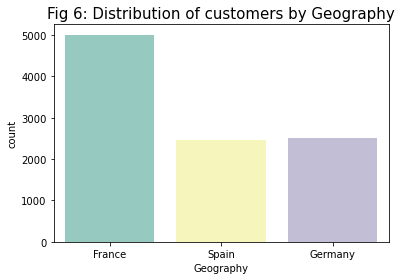

In [18]:
sns.countplot(x="Geography", data=churn_ds, palette="Set3")

plt.title('Fig 6: Distribution of customers by Geography', size= 15)
plt.show()

Most of the customers are from France. Spain and Germany sharing almost the same number of customers. 
Also, we can see there are 3 unique values therefore, we will go with one hot encoding as it is more efficient for algorithms that we will be doing later on with this data.

#### One hot encoding 

Performing one-hot encoding on Geography variable. 

In [19]:
#importing library related to OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

#Creating OneHotEncoder Object
ohencode= OneHotEncoder(sparse= False, handle_unknown= 'error', drop= 'first')

#Applying OneHotEncoding to 'Geography' using the object.
ohencode_df= pd.DataFrame(ohencode.fit_transform(churn_ds[['Geography']]))



In [20]:
ohencode_df

,0,1
0,0.0,0.0
1,0.0,1.0
2,0.0,0.0
3,0.0,0.0
4,0.0,1.0
...,...,...
9981,0.0,0.0
9982,0.0,0.0
9983,0.0,0.0
9984,1.0,0.0


In [21]:
ohencode_df= ohencode_df.rename(columns={0: 'Germany', 1: 'Spain'})
ohencode_df

,Germany,Spain
0,0.0,0.0
1,0.0,1.0
2,0.0,0.0
3,0.0,0.0
4,0.0,1.0
...,...,...
9981,0.0,0.0
9982,0.0,0.0
9983,0.0,0.0
9984,1.0,0.0


In [22]:
churn123 = churn_ds.join(ohencode_df)

In [23]:
churn123

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_cat,Germany,Spain
0,619,France,42,2,0.00,1,1,1,101348.88,1,0,0.0,0.0
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0,0,0.0,1.0
2,502,France,42,8,159660.80,3,1,0,113931.57,1,0,0.0,0.0
3,699,France,39,1,0.00,2,0,0,93826.63,0,0,0.0,0.0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,39,5,0.00,2,1,0,96270.64,0,1,NaN,NaN
9996,516,France,35,10,57369.61,1,1,1,101699.77,0,1,NaN,NaN
9997,709,France,36,7,0.00,1,0,1,42085.58,1,0,NaN,NaN
9998,772,Germany,42,3,75075.31,2,1,0,92888.52,1,1,NaN,NaN


In [24]:
churn4= churn123.dropna() 

In [25]:
churn4.shape

(9972, 13)

In [26]:
#Joining the ohencode_df with the main dataset and then drop 'Geography' column.

churn_clean = churn_ds.join(ohencode_df)

#Dropping the Geography column.
churn_clean.drop(columns=['Geography'], inplace = True)

In [27]:
churn_clean

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_cat,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0.0,1.0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,NaN,NaN
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,NaN,NaN
9997,709,36,7,0.00,1,0,1,42085.58,1,0,NaN,NaN
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,NaN,NaN


### Multivariate Visualisations

Lets plot categorical boxplots for Gender against Balance and view how Exited is distributed amongst the Customers.

Text(0.5, 1.0, 'Fig 7: Boxplot showing Status of customers against Balance vs Gender ')

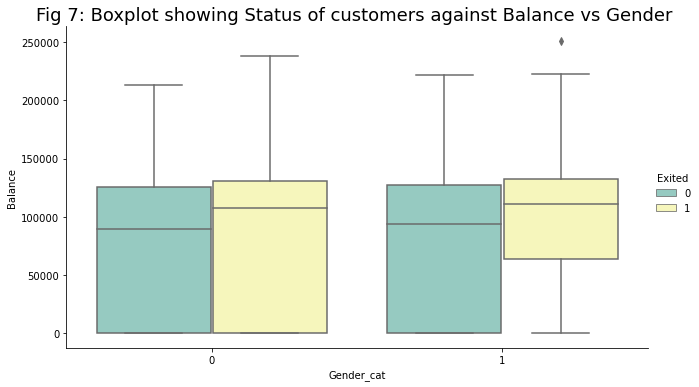

In [28]:
sns.catplot(x="Gender_cat", y="Balance",kind="box", hue="Exited" , data=churn_clean, palette="Set3", aspect= 1.8)
plt.title("Fig 7: Boxplot showing Status of customers against Balance vs Gender ", size= 18)

In Fig. 7, we can see that there is no significant difference between the balances of Male customers who have left and are associated with the bank. We can see that Female customers who have balance more than 220,000 euros tend to leave the bank.

Text(0.5, 1.0, 'Fig 8: Boxplot showing Status of customers against Balance vs Gender ')

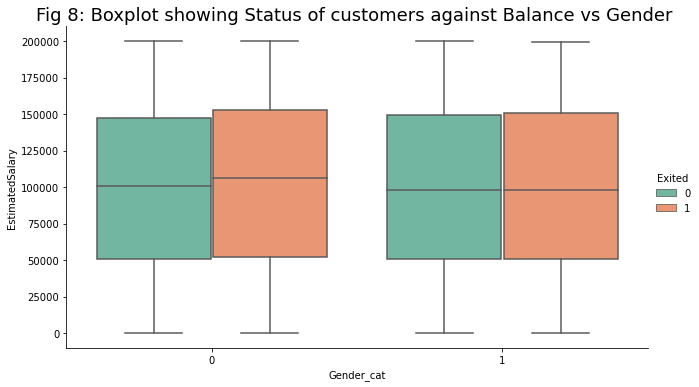

In [29]:
sns.catplot(x="Gender_cat", y="EstimatedSalary",kind="box", hue="Exited" , data=churn_clean, palette="Set2", aspect= 1.8)
plt.title("Fig 8: Boxplot showing Status of customers against Balance vs Gender ", size= 18)

Estimated Salary doesn't have any significant difference in both the Genders in terms of Exit status. We will check correlation for the same later and will drop if there isn't any correlation with other features.

We will now see the correlation among the variables by plotting a heatmap for all the features.

Text(0.5, 1.0, 'Fig 9: Heatmap showing the correlation among the variables')

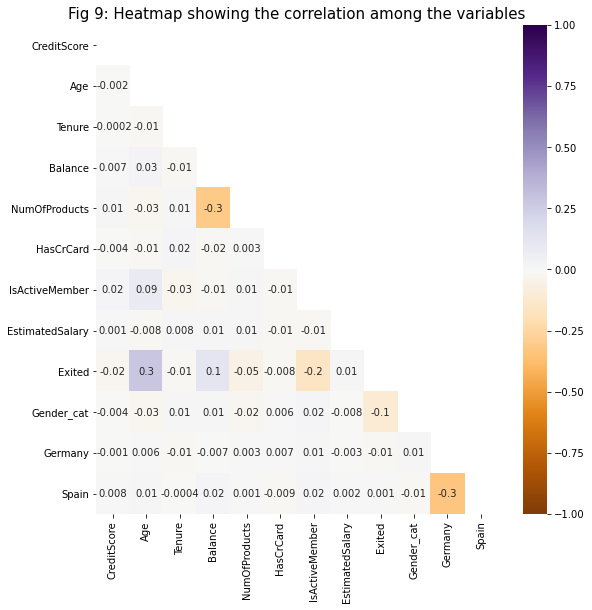

In [30]:
matrix = np.triu(churn_clean.corr())
plt.figure(figsize = (9,9))
sns.heatmap(churn_clean.corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'PuOr', mask=matrix)
plt.title('Fig 9: Heatmap showing the correlation among the variables', size= 15)

From the heatmap we can see that Exited has slight positive correlation with Age and Balance and slight negative correlation with IsActiveMember. Also, EstimatedSalary has almost no significant relation with any of the feature therefore, will be dropping it from the dataset.

In [31]:
churn_clean.drop(columns=['EstimatedSalary'], inplace = True)
churn_clean.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Gender_cat,Germany,Spain
0,619,42,2,0.00,1,1,1,1,0,0.0,0.0
1,608,41,1,83807.86,1,0,1,0,0,0.0,1.0
2,502,42,8,159660.80,3,1,0,1,0,0.0,0.0
3,699,39,1,0.00,2,0,0,0,0,0.0,0.0
4,850,43,2,125510.82,1,1,1,0,0,0.0,1.0
5,645,44,8,113755.78,2,1,0,1,1,0.0,1.0
6,822,50,7,0.00,2,1,1,0,1,0.0,0.0
8,501,44,4,142051.07,2,0,1,0,1,0.0,0.0
9,684,27,2,134603.88,1,1,1,0,1,0.0,0.0
10,528,31,6,102016.72,2,0,0,0,1,0.0,1.0


In [32]:
uniqueTenure =churn_clean['Tenure'].unique()
uniqueProd = churn_clean['NumOfProducts'].unique()

print('Unique values in Tenure :' ,uniqueTenure)
print('Unique values in Number Of Products :' ,uniqueProd)

Unique values in Tenure : [ 2  1  8  7  4  6  3 10  5  9  0]
Unique values in Number Of Products : [1 3 2 4]


Text(0.5, 1.0, 'Fig. 10: Line plot of Tenure and Number of Products of Bank customers')

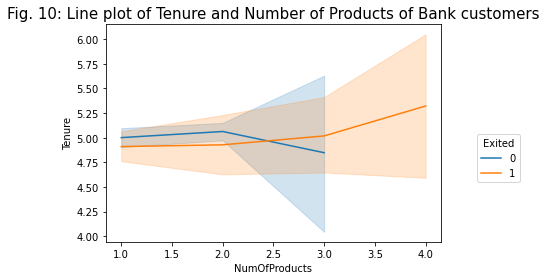

In [33]:
TenPro = sns.lineplot(x="NumOfProducts", 
                  y="Tenure",
                  hue="Exited",
                  data=churn_clean);

TenPro.legend(bbox_to_anchor=(1.25, 0.25),
          loc=4, title= 'Exited',
          borderaxespad=0.5);
plt.title("Fig. 10: Line plot of Tenure and Number of Products of Bank customers", size = 15)


       

In [34]:
churn_clean.to_csv('CustomerChurn.csv', index=False)

From Fig. 10, we can see that customers having more than 3 products, have high probability of leaving the bank as compared to the others.

## Summary and Conslusion:



On performing analysis on the independent variables after pre-processing the data, the current 20.26% churn rate shows that though most customers are Male but there is high probability of female customers having balance more than 220,000 Euro leaving the bank. The churn rate in Germany is quite high as compared to France from where most customers belong. Customers who are not an active member, has high chances of churning. Also, most customers who are associated with the bank for more than 5 years and owns more than 3 products have left the bank. This shows that the bank might be losing customers due to their poor services with time. They focus on the new customers rather than retaining the old customers or elderly customers. This is seen in the correlation numbers as well. Age is the most positively correlated feature with Exited. Further we will be able to confirm our facts once we build models with the processed dataset. 

## References:

- Waskom, M 2020, Seaborn.countplots, viewed 8th Apr 2021, <https://seaborn.pydata.org/generated/seaborn.countplot.html>.

- Smith, O 2019, Markdown in Jupyter Notebook, viewed 3rd Apr 2021, <https://www.datacamp.com/community/tutorials/markdown-in-jupyter-notebook>.

- Great Learning 2020, Label Encoding in Python Explained, viewed 3rd Apr 2021, <https://www.mygreatlearning.com/blog/label-encoding-in-python/>.

- Aksakalli, V, Yenice, Z, Kai Wong, Y,Ture, I & Malekipirbazari, M n.d., Feature Selection and Ranking in Machine Learning, viewed 2nd Apr 2021, <https://www.featureranking.com/tutorials/python-tutorials/.